In [1]:
# Logistic Regression example with sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # to make datset
from sklearn.model_selection import train_test_split # use in test ans split
from sklearn.preprocessing import StandardScaler  # use for scaling and normalization of data 
from sklearn.linear_model import LogisticRegression # main thing use to train the model 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # use for checking accuracy of model ,  report of the matrix , and find the confusion matrix score 

In [40]:
# 1) Generate a synthetic 2D dataset (so we can visualize decision boundary)
X, y = make_classification(
    n_samples=300,    # number of samples
    n_features=2,     # two features 
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=2,
    class_sep=1.2, # sepration Gap 
    random_state=100
)

In [41]:
# 2) Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

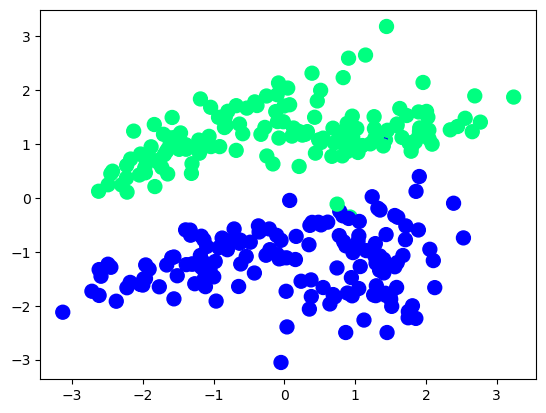

In [47]:

plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [48]:
# 3) Standardize features (important for many optimizers and interpretability)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on train and transform train
X_test_scaled = scaler.transform(X_test)        # transform test using same scaler

In [55]:
# 4) Create and train Logistic Regression model
# solver='liblinear' is good for small datasets; penalty='l2' is default regularization
# model = LogisticRegression(solver='liblinear', penalty='l2', C=1.0, random_state=0)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)  # fit model to training data

LogisticRegression()

In [56]:
# 5) Predict and evaluate
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probability for class 1

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# 6) Model parameters (weights and intercept)
print("Model intercept (w0):", model.intercept_)
print("Model coefficients (w):", model.coef_)

Accuracy on test set: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        44

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

Confusion matrix:
 [[46  0]
 [ 0 44]]
Model intercept (w0): [-0.11071381]
Model coefficients (w): [[-0.82626937  4.19711512]]


In [57]:
# 7) Plot decision boundary (for 2D features)
# Create a grid of points covering the data range
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)               # scale grid same as data
probs = model.predict_proba(grid_scaled)[:, 1]     # probability of class 1
probs = probs.reshape(xx.shape)

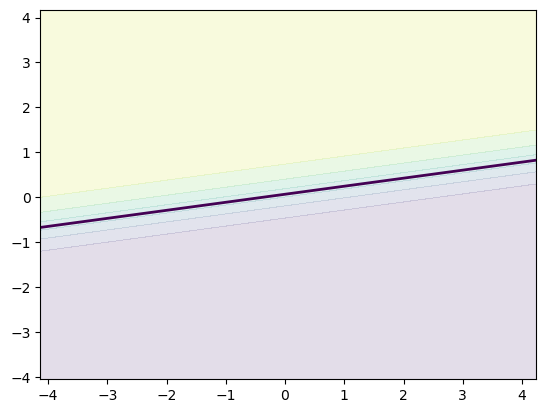

In [58]:
# contour showing probability levels; 0.5 contour is decision boundary
contour = plt.contour(xx, yy, probs, levels=[0.5], linewidths=2, linestyles='-')
plt.contourf(xx, yy, probs, alpha=0.15)            # soft color for probability


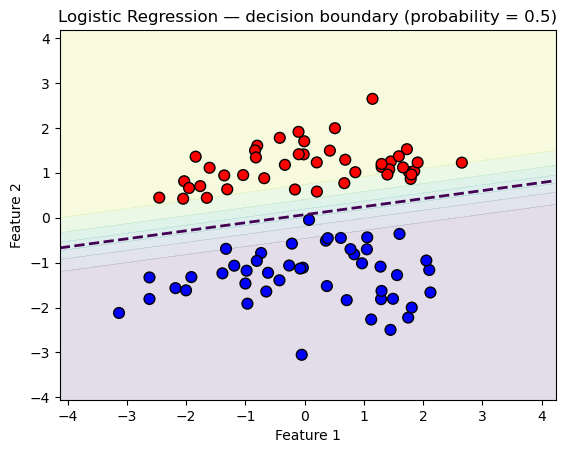

In [59]:

# contour showing probability levels; 0.5 contour is decision boundary
contour = plt.contour(xx, yy, probs, levels=[0.5], linewidths=2, linestyles='--')
plt.contourf(xx, yy, probs, alpha=0.15)            # soft color for probability
# plot test points
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k', s=60, cmap='bwr')
plt.title('Logistic Regression — decision boundary (probability = 0.5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()